In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_methodology.pdf
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_answer_choices.pdf


In [2]:
df = pd.read_csv("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [3]:
question = df.iloc[0,:]

In [4]:
question


Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [5]:
df = df.drop(index = 0)

In [6]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for col in df.columns:
    if df[col].str.isnumeric().all():
        df[col]= pd.to_numeric(df[col])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: float64(8), int64(1), object(360)
memory usage: 73.3+ MB


In [9]:
arab = ("Algeria, Bahrain, Comoros, Djibouti, Egypt, Iraq, Jordan, Kuwait, Lebanon, Libya, Morocco, Mauritania, Oman, Palestine, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, United Arab Emirates, Yemen")

In [10]:
arab = arab.split(", ")

In [11]:
arab

['Algeria',
 'Bahrain',
 'Comoros',
 'Djibouti',
 'Egypt',
 'Iraq',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Morocco',
 'Mauritania',
 'Oman',
 'Palestine',
 'Qatar',
 'Saudi Arabia',
 'Somalia',
 'Sudan',
 'Syria',
 'Tunisia',
 'United Arab Emirates',
 'Yemen']

In [12]:
question 

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [13]:
df["Q3"].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China',
       'Iran, Islamic Republic of...', 'United States of America',
       'Italy', 'Viet Nam', 'Israel', 'Peru', 'South Africa', 'Other',
       'Spain', 'Bangladesh',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Switzerland', 'Algeria', 'Tunisia', 'Argentina', 'Sweden',
       'Colombia', 'I do not wish to disclose my location', 'Canada',
       'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia', 'Romania',
       'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus', 'Ireland',
       'Portugal', 'Hong Kong (S.A.R.)', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 'Norway', 'Czech Republic'],
      dtype=obje

In [14]:
arab_df = df[df["Q3"].isin(arab)]

In [15]:
arab_df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
20,650,30-34,Man,Egypt,Bachelor’s degree,Other,< 1 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
34,744,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
37,244,25-29,Woman,Egypt,Master’s degree,Currently not employed,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,453,18-21,Woman,Egypt,Bachelor’s degree,Student,1-3 years,Python,R,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,MLflow,NaN,NaN
85,161,25-29,Man,Algeria,Professional doctorate,Student,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,839,18-21,Man,United Arab Emirates,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25807,733,22-24,Woman,Egypt,Master’s degree,Software Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25831,744,18-21,Woman,Egypt,Bachelor’s degree,Student,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,534,22-24,Man,Egypt,Some college/university study without earning ...,Student,3-5 years,Python,NaN,NaN,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,NaN,NaN


In [16]:
arab_df.shape

(1018, 369)

## line blot age destination

In [17]:
arab_df["Q1"]

20       30-34
34       30-34
37       25-29
48       18-21
85       25-29
         ...  
25707    18-21
25807    22-24
25831    18-21
25875    22-24
25969    30-34
Name: Q1, Length: 1018, dtype: object

In [18]:
arab_df["Q1"].value_counts()

22-24    250
25-29    190
18-21    179
30-34    130
35-39    109
40-44     74
45-49     45
50-54     23
60-69     10
55-59      8
Name: Q1, dtype: int64

In [19]:
arab_df['Q1']

20       30-34
34       30-34
37       25-29
48       18-21
85       25-29
         ...  
25707    18-21
25807    22-24
25831    18-21
25875    22-24
25969    30-34
Name: Q1, Length: 1018, dtype: object

In [20]:
arab_df["Q1"].value_counts().sort_index()

18-21    179
22-24    250
25-29    190
30-34    130
35-39    109
40-44     74
45-49     45
50-54     23
55-59      8
60-69     10
Name: Q1, dtype: int64

In [21]:
age_group = arab_df['Q1'].value_counts().sort_index()

In [22]:
import matplotlib.pyplot as plt

In [23]:
x = age_group.index
y = age_group.values

In [24]:
x

Index(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69'],
      dtype='object')

In [25]:
y

array([179, 250, 190, 130, 109,  74,  45,  23,   8,  10])

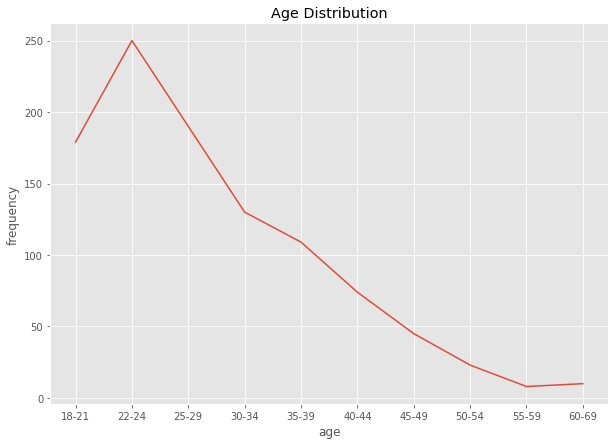

In [26]:
plt.style.use("ggplot")
plt.figure(figsize=(10,7))
plt.title("Age Distribution")
plt.xlabel("age")
plt.ylabel("frequency")
plt.plot(x,y)
plt.show()

In [27]:
arab_df['Q3'].value_counts().sort_values()

Iraq                     43
Algeria                  44
Saudi Arabia             89
Tunisia                 109
United Arab Emirates    111
Morocco                 140
Egypt                   482
Name: Q3, dtype: int64

In [28]:
countries_distribution = arab_df['Q3'].value_counts()

In [29]:
countries_distribution

Egypt                   482
Morocco                 140
United Arab Emirates    111
Tunisia                 109
Saudi Arabia             89
Algeria                  44
Iraq                     43
Name: Q3, dtype: int64

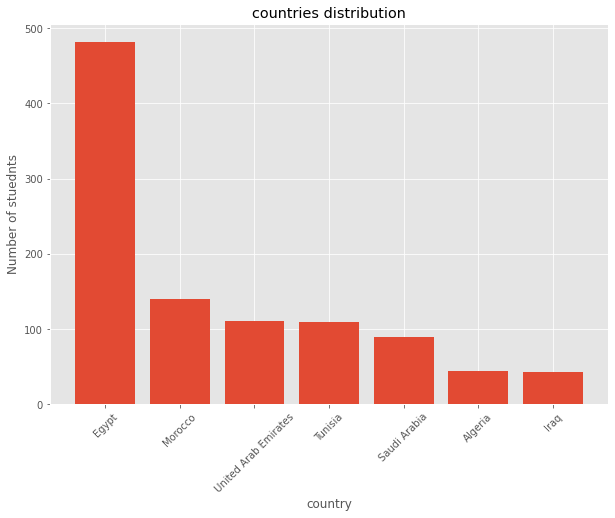

In [30]:
plt.figure(figsize=(10,7))
plt.title("countries distribution")
plt.xlabel("country")
plt.ylabel("Number of stuednts")
plt.bar(countries_distribution.index ,countries_distribution.values)
plt.xticks(rotation = 45)
plt.show()

## Arab kaggle users by programming langague distribution

In [31]:
q7_columns= arab_df.columns[arab_df.columns.str.contains("Q7")]

In [32]:
q7_columns

Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'],
      dtype='object')

In [33]:
arab_df[q7_columns]

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
34,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,Python,NaN,NaN,C,C++,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25807,Python,R,SQL,C,C++,Java,Javascript,NaN,NaN,Bash,MATLAB,NaN,NaN
25831,Python,NaN,SQL,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25875,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
arab_df["Q7_Part_1"].value_counts()[0]

838

In [35]:
dic_7 = dict()
for col in q7_columns:
    key = arab_df[col].value_counts().index[0]
    dic_7[key] =arab_df[col].value_counts()[0]

In [36]:
dic_7

{'Python': 838,
 'R': 151,
 'SQL': 449,
 'C': 241,
 'C++': 293,
 'Java': 277,
 'Javascript': 212,
 'Julia': 5,
 'Swift': 14,
 'Bash': 54,
 'MATLAB': 183,
 'None': 9,
 'Other': 98}

In [37]:
pd.Series(dic_7)

Python        838
R             151
SQL           449
C             241
C++           293
Java          277
Javascript    212
Julia           5
Swift          14
Bash           54
MATLAB        183
None            9
Other          98
dtype: int64

In [38]:
q7_series = pd.Series(dic_7)

In [39]:
q7_series = q7_series.sort_values(ascending = False)

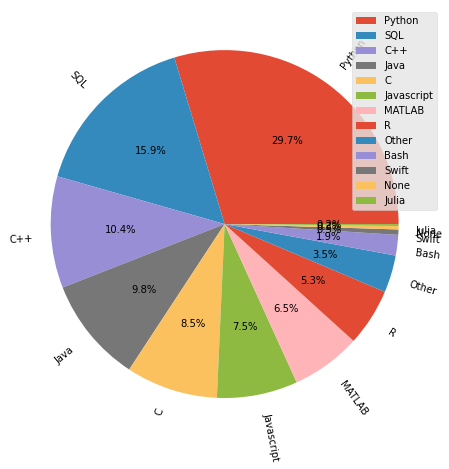

In [40]:
plt.figure(figsize= (10,8))
plt.pie(q7_series , labels=q7_series.index , rotatelabels = 45, autopct="%1.1f%%" )
plt.legend(q7_series.index)
plt.show()

In [41]:
custom_color = ('#05b7f6, #1abaf1, #2bbeec, #3bc0e7, #4ac3e2, #53c6df, #5dc8dd, #66cbda, #6eced8, #76d2d6, #7ed5d5, #87d8d3')
custom_color =custom_color.split(", ")

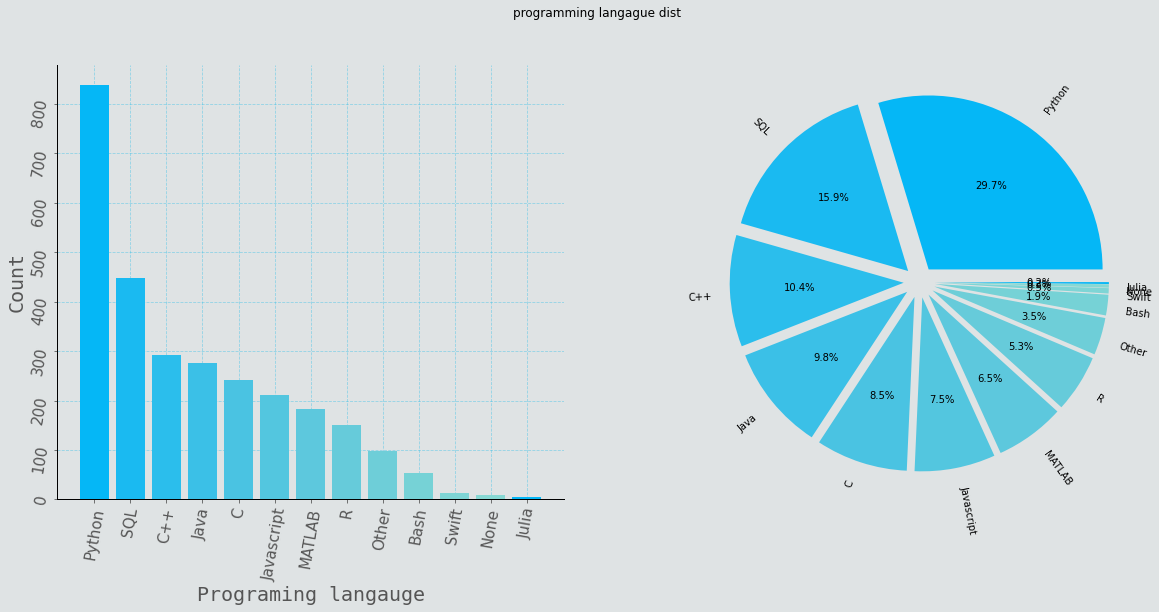

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
fig.patch.set_facecolor("#DFE3E4")
axes[0].bar(q7_series.index,q7_series.values, color =custom_color)
axes[0].set_ylabel("Count",fontname = "monospace" ,size = 20)
axes[0].set_xlabel("Programing langauge",size=20,fontname = "monospace")
axes[0].tick_params(labelrotation = 80, labelsize = 15 )
axes[0].patch.set_facecolor("#DFE3E4")
axes[0].grid(color='#3bc0e7',alpha = 0.5 , linestyle= "--")
axes[0].spines['bottom'].set_color("black")
axes[0].spines['left'].set_color("black")
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[1]=plt.pie(q7_series , labels=q7_series.index , rotatelabels = 45, autopct="%1.1f%%",colors=custom_color,explode =[0.09 for i in range (len(q7_series))] )
plt.suptitle("programming langague dist")
plt.show()